In [2]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Interacting Holographic Dark Energy Model (IHDE)
### For the holographic dark energy model with the dark matter interaction, the evolution of the 
### the density parameter is given by 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{Q \Omega_{de}}{(1+z)H\rho_c} - \frac{3 \Omega_{de} \Omega_{ls} \omega_{ls}}{z+1} \,
$$
### We consider a Universe dominated by the dark matter, dark energy, radiation and barionic matter, i.e. 
$$
\Omega_{de} + \Omega_{cdm} + \Omega_{b} + \Omega_r = 1
$$
### Using the form for the interaction paramter (https://iopscience.iop.org/article/10.1088/1475-7516/2012/06/009) 
$$
Q = \Gamma H \frac{\rho_{de}^{\beta} \rho_{dm}^{\alpha} }{\rho_{c}^{\alpha + \beta -1}} = \Gamma H \rho_{c} \Omega_{de}^{\beta} \Omega_{dm}^{\alpha}
$$

### The density equation in this case is 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{\Gamma \Omega_{de}^{\beta +1} \Omega_{dm}^{\alpha}}{(1+z)} - \frac{3 \Omega_{de} \Omega_{r} \omega_{r}}{z+1} \,
$$
### where $\Omega_{r} = \Omega_{r0}(z+1)^4$ and $\omega_r = 1/3$. 
### 

$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{\Gamma \Omega_{de}^{\beta +1} (1-\Omega_{de} -  \Omega_{b} - \Omega_r )^{\alpha}}{(1+z)} -  \Omega_{de} \Omega_{r0}(z+1)^3 \,
$$

In [3]:
alpha = [0.999,1.0,1.01,1.0001]
beta  = [0.5,1,5,2,10]
Gamma = [0.5,1,2.5,10,20] 
c =  [0.8,1.0,1.5,1.8,2.0]
Omega_r0 = 0.0001
Omega_b0 = 0.3


def zhang_model1 (Omega,z):
    Omegab = Omega_b0*(1+z)**3
    Omegar = Omega_r0*(1+z)**4
    for i in c:
              dOmdz = (Omega*(Omega-1)/(z+1))*((2*(np.sqrt(Omega)))/i + 1) + (Gamma[0]*Omega**(beta[0]+1))*((1 - Omega - Omegab - Omegar)**alpha[1])/(1+z) - Omega*Omega_r0*(z+1)**3
    return (dOmdz)    


z_rs = np.linspace(0,3,300)
O_de0 = 0.7
sol = odeint(zhang_model1,O_de0,z_rs)


In [34]:
import numpy as np
from scipy.integrate import odeint

alpha = [0.999, 1.0, 1.01, 1.0001]
beta = [0.5, 1, 5, 2, 10]
Gamma = [0.5, 1, 2.5, 10, 20]
c = [0.8, 1.0, 1.5, 1.8, 2.0]
Omega_r0 = 0.0001
Omega_b0 = 0.3

def zhang_model1(Omega, z, c_value, beta_value, gamma_value):
    Omegab = Omega_b0 * (1 + z) ** 3
    Omegar = Omega_r0 * (1 + z) ** 4
    dOmdz = (Omega * (Omega - 1) / (z + 1)) * ((2 * (np.sqrt(Omega))) / c_value + 1) + \
            (gamma_value * Omega ** (beta_value + 1)) * ((1 - Omega - Omegab - Omegar) ** alpha[1]) / (1 + z) - \
            Omega * Omega_r0 * (z + 1) ** 3
    return dOmdz

z_rs = np.linspace(0, 2, 300)
O_de0 = 0.7


solutions1 = []
for c_value in c: 
    sol = odeint(zhang_model1, O_de0, z_rs, args=(c_value, beta[0],Gamma[0]))
    solutions1.append(sol)




In [35]:

solutions2 = []
for c_value in c: 
    sol2 = odeint(zhang_model1, O_de0, z_rs, args=(c_value, beta[1],Gamma[1]))
    solutions2.append(sol2)


In [36]:

solutions3 = []
for c_value in c: 
    sol3 = odeint(zhang_model1, O_de0, z_rs, args=(c_value, beta[2],Gamma[2]))
    solutions3.append(sol3)

Text(0.5, 1.0, '$ \\alpha = 1$  and $ \\beta= \\Gamma = 0.5 $')

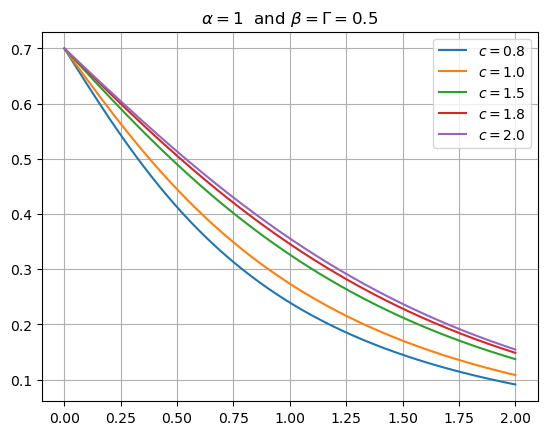

In [37]:
c = [0.8, 1.0, 1.5, 1.8, 2.0]
plt.plot(z_rs,solutions1[0],label='$c = 0.8$')
plt.plot(z_rs,solutions1[1],label='$c = 1.0$')
plt.plot(z_rs,solutions1[2],label='$c = 1.5$')
plt.plot(z_rs,solutions1[3],label='$c = 1.8$')
plt.plot(z_rs,solutions1[4],label='$c = 2.0$')
plt.legend()
plt.grid()
plt.title('$ \\alpha = 1$  and $ \\beta= \\Gamma = 0.5 $')



Text(0.5, 1.0, '$ \\alpha = 1$  and $ \\beta= \\Gamma = 1.0 $')

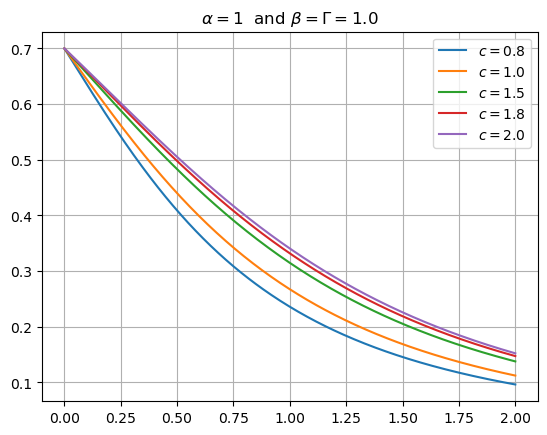

In [38]:
plt.plot(z_rs,solutions2[0],label='$c = 0.8$')
plt.plot(z_rs,solutions2[1],label='$c = 1.0$')
plt.plot(z_rs,solutions2[2],label='$c = 1.5$')
plt.plot(z_rs,solutions2[3],label='$c = 1.8$')
plt.plot(z_rs,solutions2[4],label='$c = 2.0$')
plt.legend()
plt.grid()
plt.title('$ \\alpha = 1$  and $ \\beta= \\Gamma = 1.0 $')

Text(0.5, 1.0, '$ \\alpha = 1$, $ \\beta= 5 $ and $ \\Gamma = 2.5 $')

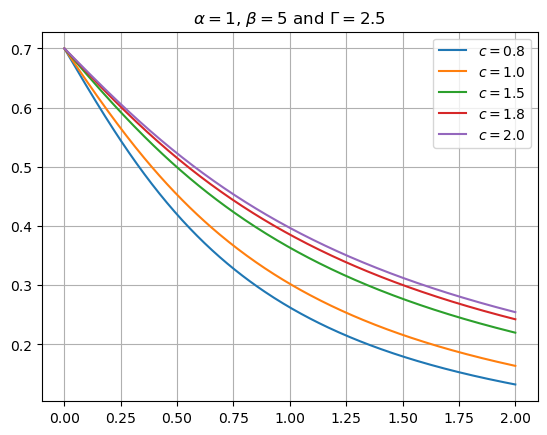

In [39]:
plt.plot(z_rs,solutions3[0],label='$c = 0.8$')
plt.plot(z_rs,solutions3[1],label='$c = 1.0$')
plt.plot(z_rs,solutions3[2],label='$c = 1.5$')
plt.plot(z_rs,solutions3[3],label='$c = 1.8$')
plt.plot(z_rs,solutions3[4],label='$c = 2.0$')
plt.legend()
plt.grid()
plt.title('$ \\alpha = 1$, $ \\beta= 5 $ and $ \\Gamma = 2.5 $')

In [40]:
arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]


def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)


red_z = np.linspace(0, 2, 300)
hubz = hub(red_z)


In [44]:

sol2_rs_0 = solutions2[0].reshape(-1)
sol2_rs_1 = solutions2[1].reshape(-1)
sol2_rs_2 = solutions2[2].reshape(-1)
sol2_rs_3 = solutions2[3].reshape(-1)
sol2_rs_4 = solutions2[4].reshape(-1)

In [57]:
Om= 0.3
Or= 0.0001


def RHSquared_z0(z):
    return 70*np.sqrt(Or*(z + 1)**4 + Om*(z + 1)**3  + sol2_rs_0)


def RHSquared_z1(z):
    return 70*np.sqrt(Or*(z + 1)**4 + Om*(z + 1)**3  + sol2_rs_1)


def RHSquared_z2(z):
    return 70*np.sqrt(Or*(z + 1)**4 + Om*(z + 1)**3  + sol2_rs_2)


def RHSquared_z3(z):
    return 70*np.sqrt(Or*(z + 1)**4 + Om*(z + 1)**3  + sol2_rs_3)


def RHSquared_z4(z):
    return 70*np.sqrt(Or*(z + 1)**4 + Om*(z + 1)**3  + sol2_rs_4)





hub0 = RHSquared_z0(z_rs)
hub1 = RHSquared_z1(z_rs)
hub2 = RHSquared_z2(z_rs)
hub3 = RHSquared_z3(z_rs)
hub4 = RHSquared_z4(z_rs)


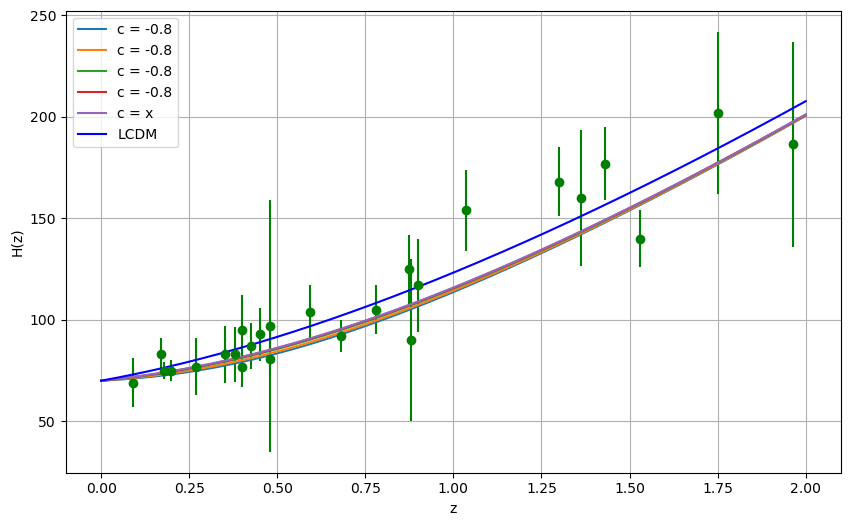

In [59]:

plt.figure(figsize=(10,6))
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.plot(z_rs,hub0, label='c = -0.8')
plt.plot(z_rs,hub1, label='c = -0.8')
plt.plot(z_rs,hub2, label='c = -0.8')
plt.plot(z_rs,hub3, label='c = -0.8')
plt.plot(z_rs,hub4, label='c = x')
plt.plot(red_z,hubz, label='LCDM',color='blue')
plt.ylabel('H(z)')
plt.xlabel('z')
#plt.plot(redz, hubzc, label='GGC')
plt.legend()
plt.grid()